<div class="alert alert-primary" style="margin-top: 20px; padding: 20px; border-radius: 10px;background-color:  #F99B0C ; color: softblue;">

<h1><center>Amazon Review NLP</center></h1>
    
</div>

# Importing

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier



filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
!pip install textblob
!pip install nltk
!pip install twython
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpor

In [3]:
df = pd.read_excel("/kaggle/input/amazon/amazon.xlsx")
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


# Normalizing Case Folding

In [4]:
df["Review"] = df["Review"].str.lower()
df["Review"].head()

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windows.<br />imag...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i can't believe the qu...
Name: Review, dtype: object

# Punctuations

In [5]:
df["Review"] = df["Review"].str.replace('[^\w\s]', '')
df["Review"].head()

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windows.<br />imag...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i can't believe the qu...
Name: Review, dtype: object

# Numbers

In [6]:
df["Review"] = df["Review"].str.replace('\d', '')
df["Review"].head()

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windows.<br />imag...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i can't believe the qu...
Name: Review, dtype: object

# Stopwords

In [7]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
sw = stopwords.words("english")
df["Review"] = df["Review"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["Review"].head()

0                                                happy
1    good quality material however panels mis-matched.
2    product fun bedroom windows.<br />imagery bit ...
3    lo unico que gustaria es que sean un poco mas ...
4    great bang buck can't believe quality material...
Name: Review, dtype: object

# Rarewords

In [8]:
temp_df = pd.Series(" ".join(df["Review"]).split()).value_counts()
drop = pd.Series(" ".join(df["Review"]).split()).value_counts()[-1000:]
df["Review"] = df["Review"].apply (lambda x: " ".join(x for x in x.split() if x not in drop))
df["Review"].head(20)

0                                                 happy
1     good quality material however panels mis-matched.
2     product fun bedroom windows.<br />imagery bit ...
3     lo unico que gustaria es que sean un poco mas ...
4     great bang buck can't believe quality material...
5                                 looks different photo
6     exactly looking for. heavy material. great pri...
7     looking picture, thought curtains would thinne...
8     much whiter thought would wasn’t really expect...
9     curtains picture shows. 3rd set ambesonne curt...
10    blocks views living room front door kitchen/di...
11                     private closed. darkening point.
12                                    don’t block light
13    work fine night curtains sheer daytime labeled...
14                                                     
15    love curtain!! printed polyester type material...
16                             love hem one smaller one
17    second time writing review amazon, always 

# lemmatization

In [9]:
nltk.download('punkt')
nltk.download('wordnet')
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Text Visualization

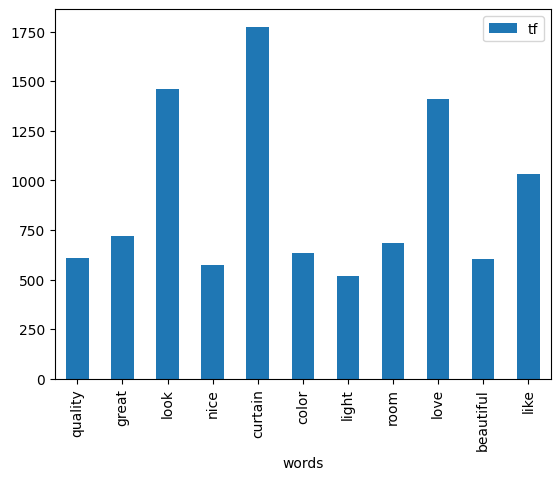

In [10]:
tf = df["Review"].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns= ["words", "tf"]
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show();

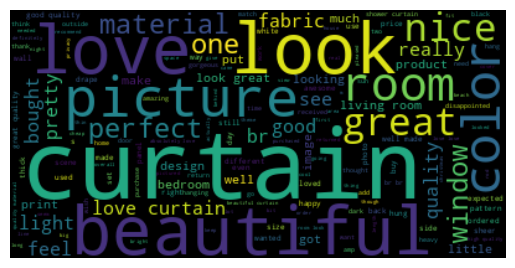

In [11]:
text = " ".join(i for i in df.Review)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

# Text Preprocessing

In [12]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df["sentiment_label"].value_counts()
df.groupby("sentiment_label")["Star"].mean()
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
2    {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...
7    {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

0   0.57
1   0.44
2   0.72
3   0.00
4   0.90
5   0.00
6   0.62
7   0.93
8   0.00
9   0.71
Name: Review, dtype: float64

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

sentiment_label
pos    4793
neg     818
Name: count, dtype: int64

sentiment_label
neg   3.45
pos   4.57
Name: Star, dtype: float64

In [13]:
y = df["sentiment_label"]
X = df["Review"]

# model

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    random_state=42)

In [15]:
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_X)
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_X)
X_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_X)

In [16]:
log_model = LogisticRegression().fit(X_train_tf_idf_word, train_y)

In [17]:
y_pred = log_model.predict(X_test_tf_idf_word)

In [18]:
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

           0       0.31      0.97      0.47        72
           1       1.00      0.89      0.94      1331

    accuracy                           0.89      1403
   macro avg       0.66      0.93      0.71      1403
weighted avg       0.96      0.89      0.91      1403



In [19]:
cross_val_score(log_model, X_test_tf_idf_word, test_y, cv=5).mean()

0.8538891713268937

In [20]:
random_review = pd.Series(df["Review"].sample(1).values)
new_review = CountVectorizer().fit(train_X).transform(random_review)
pred = log_model.predict(new_review)

In [21]:
print(f"Review: {random_review[0]} Prediction: {pred}")

Review: recommend it. Prediction: [1]


In [22]:
rf_model = RandomForestClassifier().fit(X_train_tf_idf_word, train_y)
cross_val_score(rf_model,X_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.8987849517031012